# Advanced ML

## Kernel Principal Component Analysis (KPCA) 

One downside of using an RBF kernel PCA for dimensionality reduction is that we have to specify the parameter gamma a priori. Finding an appropriate value for gamma requires experimentation and is best done using algorithms for parameter tuning, for example, grid search

1. Computation of the kernel (similarity) matrix.
In this first step, we need to calculate

$κ(xi,xj)=exp(−γ∥xi−xj∥_2)$

for every pair of points. E.g., if we have a dataset of 100 samples, this step would result in a symmetric 100x100 kernel matrix.

2. Eigendecomposition of the kernel matrix.
Since it is not guaranteed that the kernel matrix is centered, we can apply the following equation to do so:

$K′=K−1_NK−K1_N+1_NK1_N$

where $1_N$ is (like the kernel matrix) a N×N matrix with all values equal to 1N.

Now, we have to obtain the eigenvectors of the centered kernel matrix that correspond to the largest eigenvalues. Those eigenvectors are the data points already projected onto the respective principal components.

Below, we implement those steps in Python to see how those computations work.

In [1]:
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

### Custom Kernel PCA

In [2]:
## Define RBF Kernel PCA algorithm
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]

    gamma: float
      Tuning parameter of the RBF kernel
    
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] 
                            for i in range(1, n_components + 1)))

    return X_pc

## Example 1 - Separating Half moons 

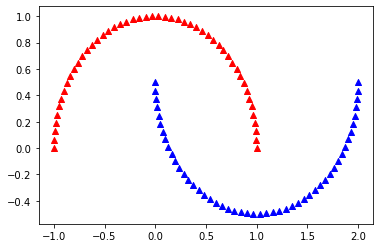

In [16]:
# 1. Generate nonlinear data in the shape of half moons 
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0, 1], c='r', marker='^')
plt.scatter(X[y==1,0], X[y==1, 1], c='b', marker='^')
plt.show()

Clearly, these two half-moon shapes are not linearly separable and our goal is to unfold the half-moons via kernel PCA so that the dataset can serve as a suitable input for a linear classifier.


### 1.1 Apply Standard PCA

In the right subplot, we shifted the triangular samples slightly upwards \nand the circular samples slightly downwards to better visualize the class overlap."

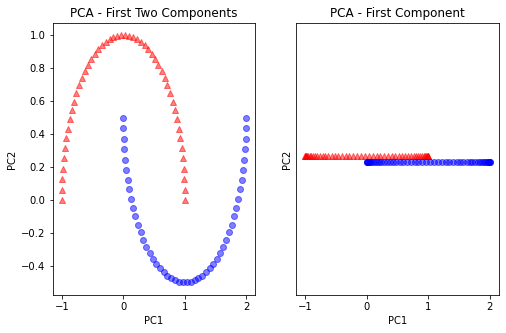

In [17]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,5))

ax[0].scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[0].set_title('PCA - First Two Components')
ax[1].set_title('PCA - First Component')
plt.show()

### 1.2 Apply Kernel PCA

With RBF Kernel PCA, the data transformed successfully to linearly separable.

C:\Users\ilyas\Anaconda3\envs\data_science\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


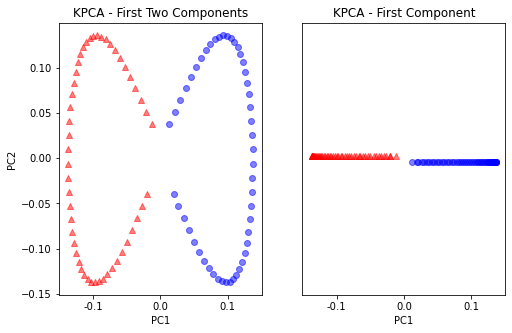

In [18]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,5))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[0].set_title('KPCA - First Two Components')
ax[1].set_title('KPCA - First Component')
plt.show()

## Example 2: Separating Concentric Circles



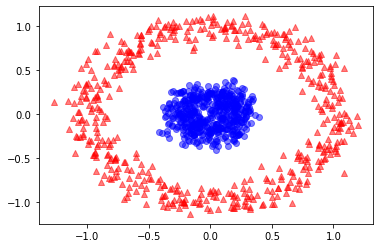

In [9]:
#Generate random data in the shape of circles
X,y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], marker='^', c='r', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b', alpha=0.5)
plt.show()

### 2.1 Apply Standard PCA

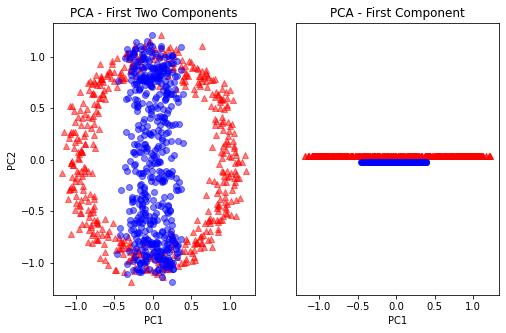

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig,ax= plt.subplots(nrows=1,ncols=2, figsize=(8,5))
ax[1].scatter(X_pca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].scatter(X_pca[y==0,0], X_pca[y==0, 1], c='r', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==0, 1], c='b', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((500,1))+0.02, c='r', marker='^',alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((500,1))-0.02, c='b', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].set_title('PCA - First Two Components')
ax[1].set_title('PCA - First Component')
plt.show()

### 2.2 Apply Kernel PCA

Again, the RBF kernel PCA projected the data onto a new subspace where the two classes become linearly separable

C:\Users\ilyas\Anaconda3\envs\data_science\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


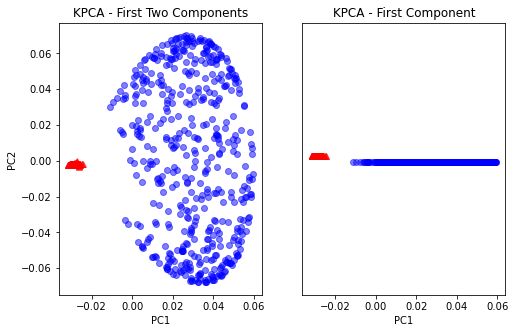

In [13]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,5))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].set_title('KPCA - First Two Components')
ax[1].set_title('KPCA - First Component')
plt.show()

Adapted and improved from: https://sebastianraschka.com/Articles/2014_kernel_pca.html